## Regresión Lineal; costo de un incidente de seguridad
En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos que se han visto afectado. EL conjunto de datos es generado de manera aleatoria

# 1.- Generacion del DataSet

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del DataSet es:", len(X))

La longitud del DataSet es: 100


# 2.- Visualización del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

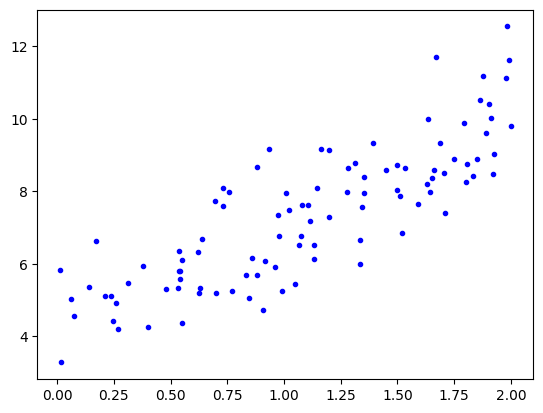

In [3]:
plt.plot(X, y, "b.") #b. pinta los puntos de color azul
plt.show()

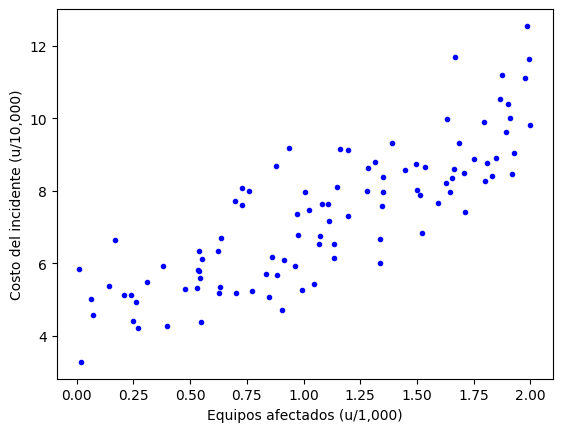

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

# 3.- Modificación del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()} #Ajustamos la función a X
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.536971,5.816857
1,0.170035,6.630527
2,0.268132,4.216519
3,1.132142,6.520384
4,1.197787,9.130234
5,1.661435,8.595720
6,0.696415,7.732551
7,0.881458,5.688879
8,1.337151,5.994949
9,0.551316,6.112548


In [7]:
# Escalado del Número de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')# Convertimos a enteros
# Escalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,536,58168
1,170,66305
2,268,42165
3,1132,65203
4,1197,91302
5,1661,85957
6,696,77325
7,881,56888
8,1337,59949
9,551,61125


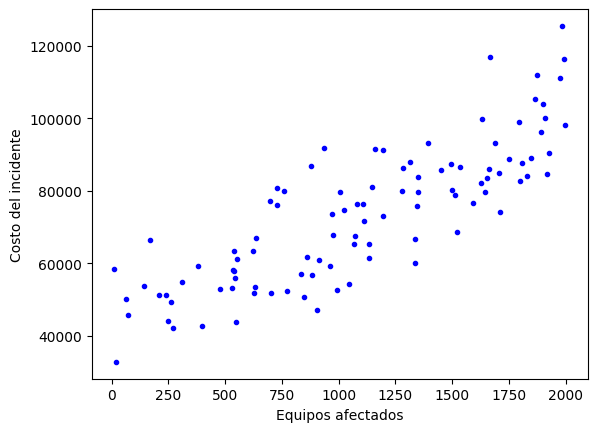

In [8]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b." )
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

# 4.- Construcción del Modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
# construccion del modelo y ajustes de la funcion de hi'potesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1,1), df['Costo'].values)

LinearRegression()

In [14]:
# Parametro Tetha 0
lin_reg. intercept_

np.float64(42364.45804334445)

In [15]:
# parametro Tetha 1
lin_reg.coef_

array([28.29925202])

In [17]:
# prediccion para el valor minimo y maximo de datos de entrenamiento 
X_min_max = np.array([[df["No_Equipos_Afectados"].min()],[df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

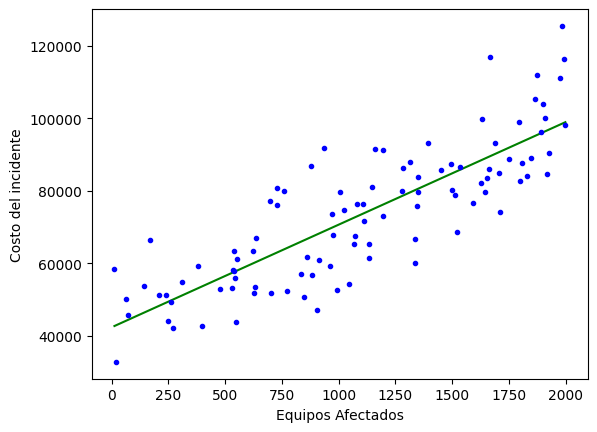

In [24]:
# Representación gráfica de la función de hipotesis generada.
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

# 5.- produccion de nuevos ejemplos

In [35]:
x_new = np.array([[2700]]) #numero de equipos afectados
# predeccion del costo que tendria el incidente
Costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $ ", int(Costo[0]))

El costo del incidente seria: $  118772


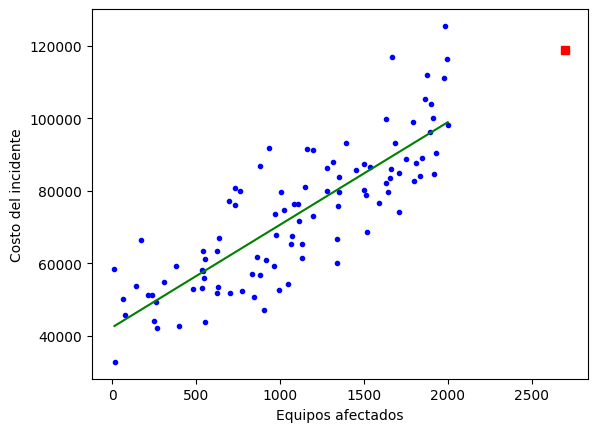

In [36]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rs")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()